In [1]:
import pandas as pd 
import json
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Functions

## Display dataset info

In [2]:
# A helper function for clean display
def display_dts_info(name, df):
    print(f"\n{'='*50}")
    print(f"1. Dataset: {name}")
    print(f"2. Shape: {df.shape}")
    print(f"3. Columns: {df.columns.tolist()}")
    print(f"\n4. Sample data:")
    display(df.head(3))
    print(f"\n5. Label distribution:")
    if 'label' in df.columns:
        display(df['label'].value_counts())
    print("\n6. Info:")
    display(df.info())

## Text length analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_word_length_distribution(
    df: pd.DataFrame,
    df_name: str = None,
    text_column: str = 'tweet',
    word_percentile: float = 95,
    figsize: tuple = (8, 6),
    dpi: int = 150
):
    """
    Plot and save a histogram of word count distribution, annotating mean & median,
    and print summary word-length statistics.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing the text column.
    df_name : str, optional
        A name identifier for the DataFrame (used in filename).
    text_column : str
        Name of the text column.
    word_percentile : float
        Percentile threshold to trim outliers (default 95).
    figsize : tuple
        Figure size.
    dpi : int
        Resolution (dots per inch) for saving (e.g., 150).
    """
    # Determine filename
    filename = f"{df_name}_word_len_distrib.png"

    # Check text column exists
    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in DataFrame")

    # Compute word counts
    tmp = df.copy()
    tmp[text_column] = tmp[text_column].fillna('').astype(str)
    tmp['word_length'] = tmp[text_column].str.split().apply(len)

    # Compute outlier threshold
    limit = np.nanpercentile(tmp['word_length'], word_percentile)
    filtered = tmp[tmp['word_length'] <= limit]

    # Compute stats
    wl = filtered['word_length']
    length_stats = {
        'mean': wl.mean(),
        'median': wl.median(),
        'min': wl.min(),
        'max': wl.max(),
        'percentile_95': np.nanpercentile(wl, 95),
        'percentile_99': np.nanpercentile(wl, 99),
        'std': wl.std()
    }

    # Print Word Length Statistics
    print("\nWord Length Statistics:")
    print(f"  Mean: {length_stats['mean']:.1f} ± {length_stats['std']:.1f}")
    print(f"  Median: {length_stats['median']:.1f}")
    print(f"  Range: [{length_stats['min']} - {length_stats['max']}]")
    print(f"  95th percentile: {length_stats['percentile_95']:.0f}")
    print(f"  99th percentile: {length_stats['percentile_99']:.0f}")

    # Plot histogram
    plt.figure(figsize=figsize)
    sns.histplot(filtered['word_length'], bins=30, kde=False, alpha=0.7)
    plt.axvline(length_stats['mean'], color='red', linestyle='--', label=f"Mean: {length_stats['mean']:.1f}")
    plt.axvline(length_stats['median'], color='orange', linestyle='--', label=f"Median: {length_stats['median']:.1f}")
    plt.title('Word Count Distribution')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()

    # Save figure
    plt.savefig(filename, dpi=dpi, bbox_inches='tight')
    plt.show()

# Covid-19

In [4]:
# Load datasets
covid_train = pd.read_csv("/kaggle/input/covid19-fake-news-dataset-nlp/Constraint_Train.csv")
covid_val = pd.read_csv("/kaggle/input/covid19-fake-news-dataset-nlp/Constraint_Val.csv")
covid_test = pd.read_csv("/kaggle/input/covid19-fake-news-dataset-nlp/Constraint_Test.csv")
covid_test_with_label = pd.read_csv("/kaggle/input/covid19-fake-news-dataset-nlp/english_test_with_labels.csv")

In [5]:
# Display info
display_dts_info("Covid Train", covid_train)
display_dts_info("Covid Val", covid_val)
display_dts_info("Covid Test With Labels", covid_test_with_label)


1. Dataset: Covid Train
2. Shape: (6420, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake



5. Label distribution:


label
real    3360
fake    3060
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


None


1. Dataset: Covid Val
2. Shape: (2140, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake



5. Label distribution:


label
real    1120
fake    1020
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


None


1. Dataset: Covid Test With Labels
2. Shape: (2140, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake



5. Label distribution:


label
real    1120
fake    1020
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


None


Word Length Statistics:
  Mean: 25.3 ± 11.6
  Median: 24.0
  Range: [3 - 47]
  95th percentile: 44
  99th percentile: 47


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


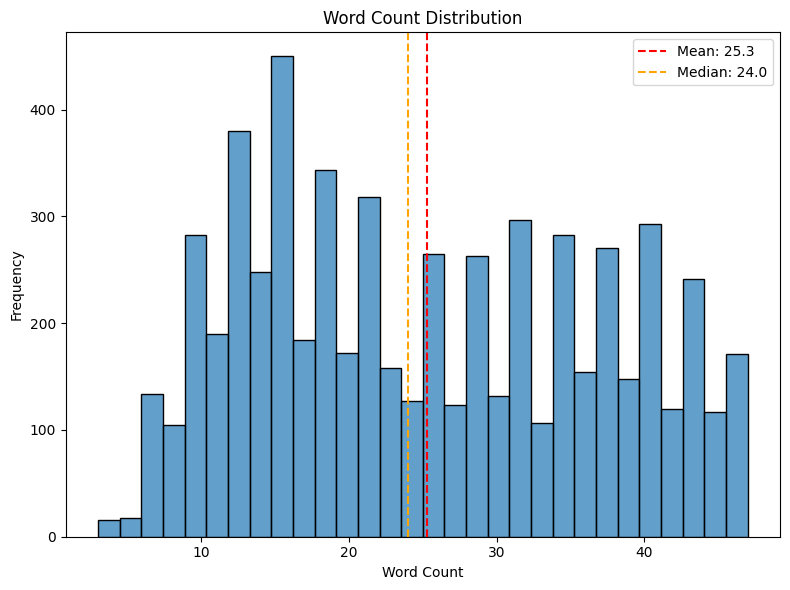

In [6]:
length_stats = plot_word_length_distribution(covid_train, df_name='covid19')

# FakeNewsNet
## GossipCop

In [7]:
gossipcop_train = pd.read_csv("/kaggle/input/gossipcop-dataset/gossipcop_train.csv")
gossipcop_val = pd.read_csv("/kaggle/input/gossipcop-dataset/gossipcop_val.csv")
gossipcop_test = pd.read_csv("/kaggle/input/gossipcop-dataset/gossipcop_test.csv")

In [8]:
# Display info
display_dts_info("GossipCop Train", gossipcop_train)
display_dts_info("GossipCop Val", gossipcop_val)
display_dts_info("GossipCop Test", gossipcop_test)


1. Dataset: GossipCop Train
2. Shape: (15498, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,Kanye West Surprises Kim Kardashian With Cloud...,real
1,2,Hollywood Mourns Death of ‘Legendary’ Harry De...,fake
2,3,Eric Dane Responds to Rebecca Gayheart's Divor...,real



5. Label distribution:


label
real    11772
fake     3726
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15498 entries, 0 to 15497
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15498 non-null  int64 
 1   tweet   15498 non-null  object
 2   label   15498 non-null  object
dtypes: int64(1), object(2)
memory usage: 363.4+ KB


None


1. Dataset: GossipCop Val
2. Shape: (3321, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,John Stamos gets engaged to Caitlin McHugh at ...,real
1,2,Former 'Bachelorette' Emily Maynard is expecti...,real
2,3,'Clueless' star Stacey Dash withdraws from con...,real



5. Label distribution:


label
real    2523
fake     798
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3321 non-null   int64 
 1   tweet   3321 non-null   object
 2   label   3321 non-null   object
dtypes: int64(1), object(2)
memory usage: 78.0+ KB


None


1. Dataset: GossipCop Test
2. Shape: (3321, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,Grant Gustin & LA Thoma Say They're 'Spirtuall...,real
1,2,Did Richard Pryor and Marlon Brando hook up? P...,real
2,3,Selena Gomez Lovingly Strokes Justin Bieber&#3...,real



5. Label distribution:


label
real    2522
fake     799
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3321 non-null   int64 
 1   tweet   3321 non-null   object
 2   label   3321 non-null   object
dtypes: int64(1), object(2)
memory usage: 78.0+ KB


None


Word Length Statistics:
  Mean: 10.9 ± 3.5
  Median: 11.0
  Range: [1 - 18]
  95th percentile: 17
  99th percentile: 18


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


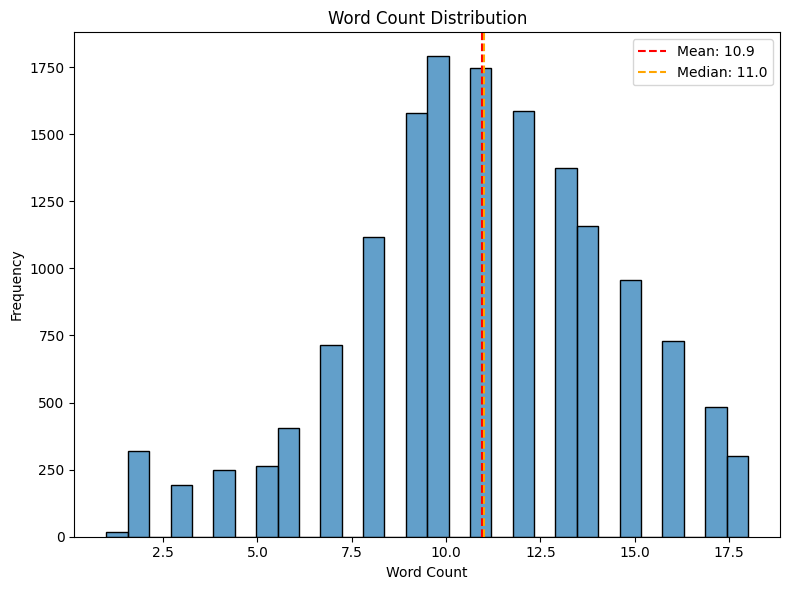

In [9]:
length_stats = plot_word_length_distribution(gossipcop_train, df_name='gossipcop')

## PolitiFact

In [10]:
pol_train = pd.read_csv("/kaggle/input/ml-20242-g1/politifact_train.csv")
pol_val = pd.read_csv("/kaggle/input/ml-20242-g1/politifact_val.csv")
pol_test = pd.read_csv("/kaggle/input/ml-20242-g1/politifact_test.csv")

In [11]:
# Display info
display_dts_info("PolitiFact Train", pol_train)
display_dts_info("PolitiFact Val", pol_val)
display_dts_info("PolitiFact Test", pol_test)


1. Dataset: PolitiFact Train
2. Shape: (739, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,Jason Aldean Gig Canceled After He Sells Out T...,fake
1,2,Melania Just Hit Donald Trump With Shocking An...,fake
2,3,"3,000-Pound Great White Shark Captured in Grea...",fake



5. Label distribution:


label
real    437
fake    302
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      739 non-null    int64 
 1   tweet   739 non-null    object
 2   label   739 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.4+ KB


None


1. Dataset: PolitiFact Val
2. Shape: (158, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,Redirect Notice,real
1,2,Daily Fuel Gauge Report Aug 1,real
2,3,Miley Cyrus: 'Donald Trump Is a F--king Nightm...,fake



5. Label distribution:


label
real    93
fake    65
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      158 non-null    int64 
 1   tweet   158 non-null    object
 2   label   158 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


None


1. Dataset: PolitiFact Test
2. Shape: (159, 3)
3. Columns: ['id', 'tweet', 'label']

4. Sample data:


,id,tweet,label
0,1,Testimony on CBO’s Assessment of the Air Force...,real
1,2,Romney For President Launches New Television A...,real
2,3,3/8/14 Sen. Rob Portman (R-OH) delivers Weekly...,real



5. Label distribution:


label
real    94
fake    65
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      159 non-null    int64 
 1   tweet   159 non-null    object
 2   label   159 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


None


Word Length Statistics:
  Mean: 8.8 ± 4.0
  Median: 9.0
  Range: [1 - 17]
  95th percentile: 15
  99th percentile: 17


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


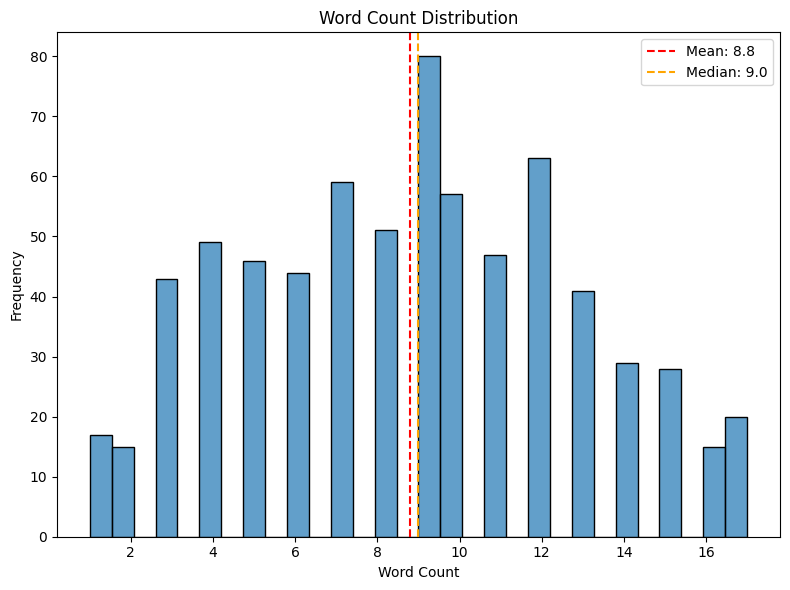

In [12]:
length_stats = plot_word_length_distribution(pol_train, df_name='politifact')

# LIAR

In [13]:
liar_train = pd.read_csv("/kaggle/input/ml-20242-g1/liar_train_covid_format.csv")
liar_valid = pd.read_csv("/kaggle/input/ml-20242-g1/liar_valid_covid_format.csv")
liar_test = pd.read_csv("/kaggle/input/ml-20242-g1/liar_test_covid_format.csv")

In [14]:
# Display info
display_dts_info("LIAR Train", liar_train)
display_dts_info("LIAR Val", liar_valid)
display_dts_info("LIAR Test", liar_test)


1. Dataset: LIAR Train
2. Shape: (10240, 4)
3. Columns: ['id', 'tweet', 'label', 'original_label']

4. Sample data:


,id,tweet,label,original_label
0,2635.json,Says the Annies List political group supports ...,fake,false
1,10540.json,When did the decline of coal start? It started...,fake,half-true
2,324.json,"Hillary Clinton agrees with John McCain ""by vo...",real,mostly-true



5. Label distribution:


label
fake    6602
real    3638
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10240 non-null  object
 1   tweet           10240 non-null  object
 2   label           10240 non-null  object
 3   original_label  10240 non-null  object
dtypes: object(4)
memory usage: 320.1+ KB


None


1. Dataset: LIAR Val
2. Shape: (1284, 4)
3. Columns: ['id', 'tweet', 'label', 'original_label']

4. Sample data:


,id,tweet,label,original_label
0,12134.json,We have less Americans working now than in the...,fake,barely-true
1,238.json,"When Obama was sworn into office, he DID NOT u...",fake,pants-fire
2,7891.json,Says Having organizations parading as being so...,fake,false



5. Label distribution:


label
fake    864
real    420
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1284 non-null   object
 1   tweet           1284 non-null   object
 2   label           1284 non-null   object
 3   original_label  1284 non-null   object
dtypes: object(4)
memory usage: 40.3+ KB


None


1. Dataset: LIAR Test
2. Shape: (1267, 4)
3. Columns: ['id', 'tweet', 'label', 'original_label']

4. Sample data:


,id,tweet,label,original_label
0,11972.json,Building a wall on the U.S.-Mexico border will...,real,true
1,11685.json,Wisconsin is on pace to double the number of l...,fake,false
2,11096.json,Says John McCain has done nothing to help the ...,fake,false



5. Label distribution:


label
fake    818
real    449
Name: count, dtype: int64


6. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1267 non-null   object
 1   tweet           1267 non-null   object
 2   label           1267 non-null   object
 3   original_label  1267 non-null   object
dtypes: object(4)
memory usage: 39.7+ KB


None


Word Length Statistics:
  Mean: 17.0 ± 6.5
  Median: 16.0
  Range: [2 - 33]
  95th percentile: 29
  99th percentile: 33


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


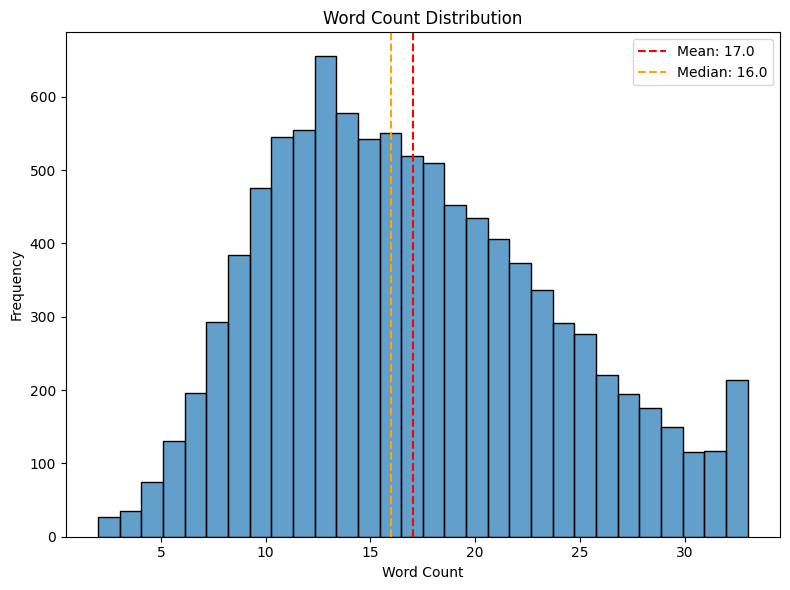

In [15]:
length_stats = plot_word_length_distribution(liar_train, df_name='liar')

In [16]:
!zip -r /kaggle/working/output_all.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/covid19_word_len_distrib.png (deflated 21%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/politifact_word_len_distrib.png (deflated 21%)
  adding: kaggle/working/liar_word_len_distrib.png (deflated 20%)
  adding: kaggle/working/gossipcop_word_len_distrib.png (deflated 22%)
